In [1]:
train_root  = r"D:\UESTC\NTU\OneDrive_1_2022-7-16\Pneumonia\chest_xray\train"
test_root = r"D:\UESTC\NTU\OneDrive_1_2022-7-16\Pneumonia\chest_xray\test"
print(train_root)

D:\UESTC\NTU\OneDrive_1_2022-7-16\Pneumonia\chest_xray\train


In [2]:
batch_size=3
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (100, 100), batch_size=batch_size)
test_data = Generator.flow_from_directory(test_root, (100, 100), batch_size=batch_size)

#optional
print(train_data[0][0][0].shape)
# total 4317 data below to 5 clasess
print(len(train_data)) #4317/batch size
print(len(train_data[0])) #2, 1st image, 2nd is label
#print(train_data[0])
print(len(train_data[0][0])) #1st batch of 10 data
print(len(train_data[0][0][0])) #the image, the vertical
print(len(train_data[0][0][0][0])) #the image, the horizontal
print(len(train_data[0][0][0][0][0])) #the image, RGB

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
(100, 100, 3)
1739
2
3
100
100
3


2


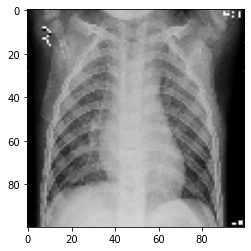

In [3]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(48, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(48, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)        0

In [6]:
#remove optimizer if needed
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = batch_size, epochs=5)

# score = model.evaluate(train_data)
# print(score)
score = model.evaluate(test_data)
print(score)

Epoch 1/5
1739/1739 [==============================] - 82s 46ms/step - loss: 0.5859 - accuracy: 0.8098
Epoch 2/5
1739/1739 [==============================] - 40s 23ms/step - loss: 0.2596 - accuracy: 0.8961
Epoch 3/5
1739/1739 [==============================] - 40s 23ms/step - loss: 0.1928 - accuracy: 0.9258
Epoch 4/5
1739/1739 [==============================] - 41s 24ms/step - loss: 0.1770 - accuracy: 0.9291
Epoch 5/5
208/208 [==============================] - 4s 19ms/step - loss: 1.0667 - accuracy: 0.7724
[1.0667351484298706, 0.7724359035491943]


In [11]:
from keras.applications.resnet import ResNet50
from keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(100,100,3))
restnet.summary()

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model1 = Sequential()
model1.add(restnet)
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history=model1.fit(train_data, batch_size = batch_size, epochs=5)

score = model1.evaluate(test_data)
print(score)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 25, 25, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 25, 25, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 25, 25, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 25, 25, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 13, 13, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 13, 13, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 13, 13, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 13, 13, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 7, 7, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 7, 7, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 7, 7, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 7, 7, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

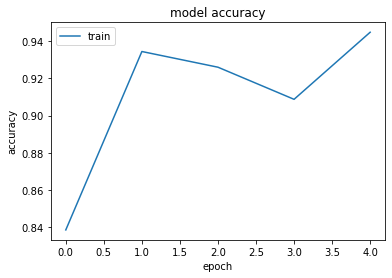

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

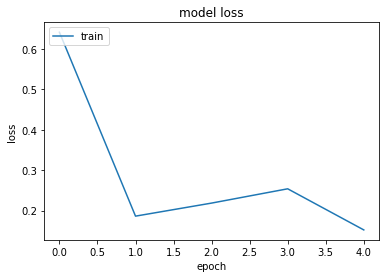

In [13]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

208/208 [==============================] - 4s 20ms/step
1.1025641025641026


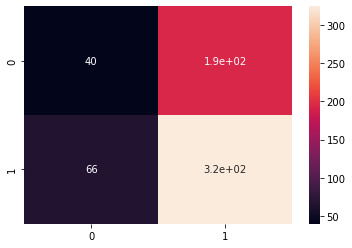

In [28]:
import seaborn as sns

pred =np.argmax(model.predict(test_data), axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)
print((cm[0,0]+cm[1,1]+cm[1,1])/(sum(sum(cm))))

In [3]:
from keras.models import save_model
save_model(model, "Pneumonia")

INFO:tensorflow:Assets written to: Pneumonia\assets


INFO:tensorflow:Assets written to: Pneumonia\assets


In [ ]:
from keras.models import load_model
from PIL import Image #use PIL
import numpy as np

model = load_model("Pneumonia")

import cv2
image = cv2.imread(r"D:\UESTC\NTU\OneDrive_1_2022-7-16\Pneumonia\chest_xray\val\NORMAL\NORMAL2-IM-1427-0001.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.merge([gray,gray,gray])

img.resize((150,150,3))
img = np.asarray(img, dtype="float32") #need to transfer to np to reshape
img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2]) #rgb to reshape to 1,100,100,3
img.shape
print(model.predict(img))

In [ ]:
from flask import Flask, render_template, request
from werkzeug.utils import secure_filename
from skimage import io
from keras.models import load_model
import cv2
from PIL import Image #use PIL
import numpy as np

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        file = request.files['file']
        print("File Received")
        filename = secure_filename(file.filename)
        print(filename)
        file.save("./static/"+filename) #Heroku no need static
        file = open("./static/"+filename,"r") #Heroku no need static

        model = load_model("Pneumonia")
        image = cv2.imread("./static/"+filename)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img = cv2.merge([gray,gray,gray])
        img.resize((150,150,3))
        img = np.asarray(img, dtype="float32") #need to transfer to np to reshape
        img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2]) #rgb to reshape to 1,100,100,3
        pred=model.predict(img)
        return(render_template("index.html", result=str(pred)))
    else:
        return(render_template("index.html", result="WAITING"))
if __name__ == "__main__":
    app.run()